In [1]:
# 3rd party
import mysql.connector
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
# get data for analysis
con = mysql.connector.connect(user='slaw', password='slaw123', database='call_center')
cursor = con.cursor()
cursor.execute("SELECT ds, no_calls FROM daily_calls ORDER BY ds ASC");
data = cursor.fetchall()
con.close()
df = pd.DataFrame(data, columns=['ds', 'y'])

In [9]:
print(df.head(10))

           ds    y
0  2017-08-22  356
1  2017-08-23  390
2  2017-08-24  376
3  2017-08-25  394
4  2017-08-26  295
5  2017-08-27  273
6  2017-08-28  498
7  2017-08-29  460
8  2017-08-30  453
9  2017-08-31  434


In [3]:
# create model
model = Prophet()
model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/slaw/my_py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
future = model.make_future_dataframe(periods=56)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2018-04-13,866.871976,796.010434,940.098834
235,2018-04-14,851.622176,780.013932,928.649154
236,2018-04-15,867.997928,801.611331,943.756590
237,2018-04-16,893.098862,822.671400,970.156523
238,2018-04-17,881.390867,812.442929,959.324275


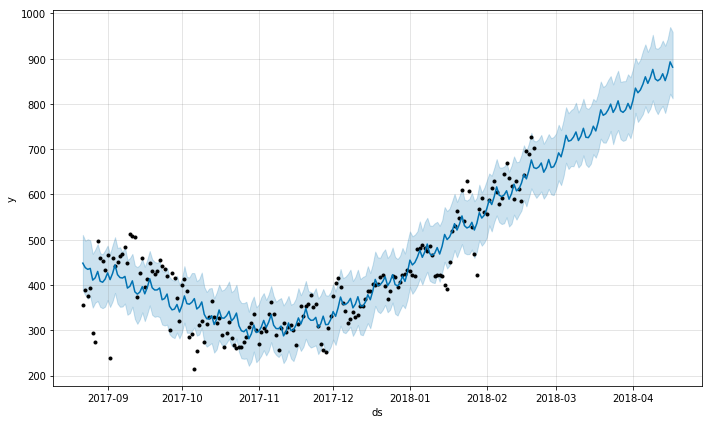

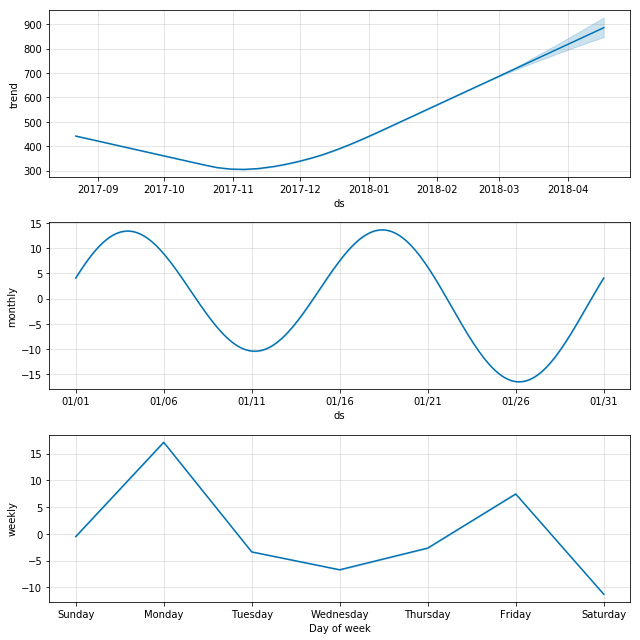

In [15]:
# plotting forcast and componentes
model.plot(forecast);
model.plot_components(forecast);